<a href="https://colab.research.google.com/github/stephaniesanjines/ds10finalproject/blob/main/Group_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,  recall_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm
from statsmodels import graphics

# Some useful libraries to import data
import requests
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Libraries for visualizations
from matplotlib import pyplot as plt
import seaborn as sns
# Some settings to make the plots prettier
%matplotlib inline
# sns.set_theme(style="ticks")
# sns.set_context("talk", font_scale=0.9)
# sns.set(font_scale = 1)
# plt.style.use('bmh')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## This is where the project begins at


In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

# We would like all available data from 2019-01-01until 2021-01-01.
start_date = '2019-01-01'
end_date = '2021-01-01'

# User pandas_reader.data.DataReader to load the desired data. 
bitcoin = data.DataReader('BTC-USD', 'yahoo', start_date, end_date)
ethereum = data.DataReader('ETH-USD', 'yahoo', start_date, end_date)
litecoin = data.DataReader('LTC-USD', 'yahoo', start_date, end_date)
xrp = data.DataReader('XRP-USD', 'yahoo', start_date, end_date)
tether = data.DataReader('USDT-USD', 'yahoo', start_date, end_date)
nasdaq = data.DataReader('^IXIC', 'yahoo', start_date, end_date)
dow = data.DataReader('^DJI', 'yahoo', start_date, end_date)
snp = data.DataReader('^GSPC', 'yahoo', start_date, end_date)



In [ ]:
#saving our data to csv files
bitcoin.to_csv('bitcoin_csv.csv')
ethereum.to_csv('ethereum_csv.csv')
litecoin.to_csv('litecoin_csv.csv')
xrp.to_csv('xrp_csv.csv')
tether.to_csv('tether_csv.csv')
snp.to_csv('snp_data.csv')
dow.to_csv('dow_data.csv')



In [ ]:
#confirm if the data have the same shapes before we merge them together
bitcoin.shape, ethereum.shape, litecoin.shape, xrp.shape, tether.shape, nasdaq.shape, dow.shape


((729, 6), (729, 6), (729, 6), (729, 6), (729, 6), (505, 6), (505, 6))

In [ ]:
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580


In [ ]:
bitcoin.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
#merge our data set by taking only the closing prices
df3 = pd.concat([bitcoin['Close'],ethereum['Close'], litecoin['Close'], xrp['Close'], tether['Close']], axis=1)
#rename the columns
df3.columns = ['BITCOINPrice', 'ETHEREUMPrice', 'LITCOINPrice','XRPPrice', 'TETHERPrice']
df3.head()

,BITCOINPrice,ETHEREUMPrice,LITCOINPrice,XRPPrice,TETHERPrice
Date,,,,,
2019-01-01,3843.520020,140.819412,31.979931,0.364771,1.018335
2019-01-02,3943.409424,155.047684,33.433681,0.375243,1.024012
2019-01-03,3836.741211,149.135010,32.026699,0.360224,1.019473
2019-01-04,3857.717529,154.581940,32.404167,0.356747,1.017200
2019-01-05,3845.194580,155.638596,34.936867,0.355275,1.018489


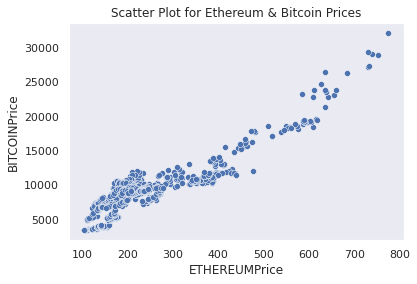

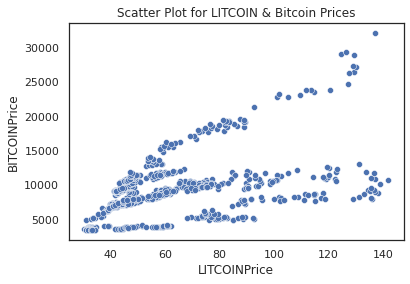

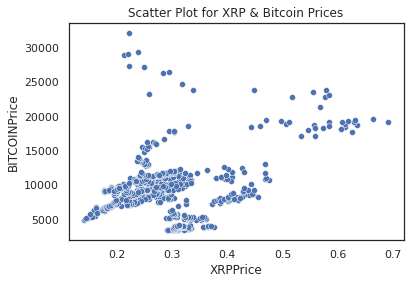

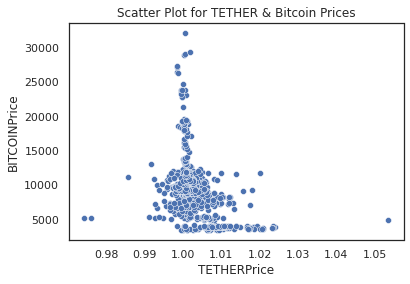

In [ ]:
#let us create some scatter plots of these variables
X_lr_1 = df3.ETHEREUMPrice
y_lr_1 = df3.BITCOINPrice

# Scatterplot for Ethereum Price and Bitcoin Price
sns.set_theme(style="dark")
sns.scatterplot(data = df3, x='ETHEREUMPrice', y='BITCOINPrice')
plt.title('Scatter Plot for Ethereum & Bitcoin Prices')
plt.show()
#scatter plot2
sns.set_theme(style="white")
sns.scatterplot(x=df3.LITCOINPrice, y=y_lr_1)
plt.title('Scatter Plot for LITCOIN & Bitcoin Prices')
plt.show()
#scatter plot3
sns.set_theme(style="white")
sns.scatterplot(x=df3.XRPPrice, y=y_lr_1)
plt.title('Scatter Plot for XRP & Bitcoin Prices')
plt.show()
#scatter plot4
sns.set_theme(style="white")
sns.scatterplot(x=df3.TETHERPrice, y=y_lr_1)
plt.title('Scatter Plot for TETHER & Bitcoin Prices')
plt.show()




In [ ]:
#Building the models
X_lr_1 = df3.ETHEREUMPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))


                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3067.
Date:                Tue, 04 May 2021   Prob (F-statistic):          5.87e-234
Time:                        02:49:29   Log-Likelihood:                -5160.5
No. Observations:                 583   AIC:                         1.032e+04
Df Residuals:                     581   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1898.3476    151.588     12.523

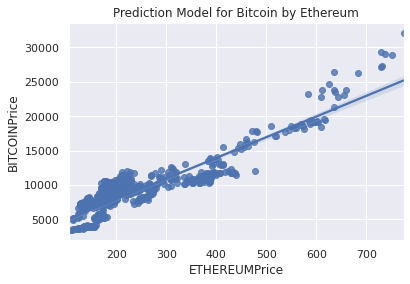

In [ ]:

#create the regression line
sns.set_theme(style="darkgrid")
sns.regplot(x=df3.ETHEREUMPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Ethereum')
plt.show()


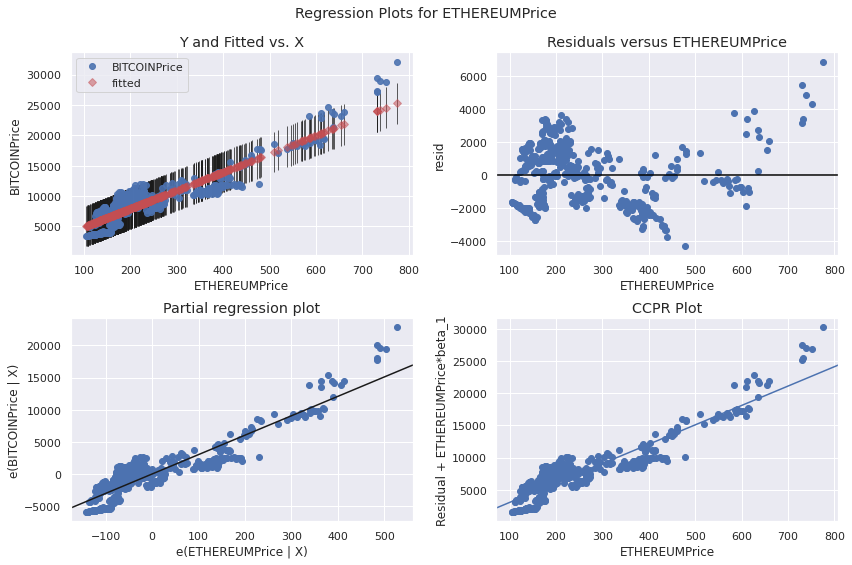

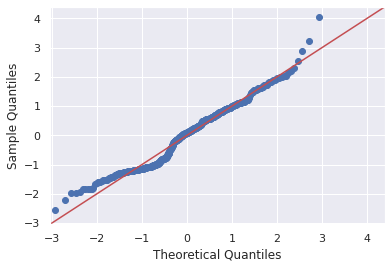

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'ETHEREUMPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     157.6
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.75e-32
Time:                        02:49:32   Log-Likelihood:                -5626.1
No. Observations:                 583   AIC:                         1.126e+04
Df Residuals:                     581   BIC:                         1.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4257.8817    433.890      9.813   

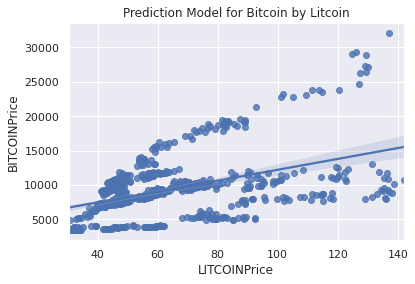

In [ ]:
#regression line for Litcoin
#Building the models
X_lr_1 = df3.LITCOINPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.LITCOINPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Litcoin')
plt.show()


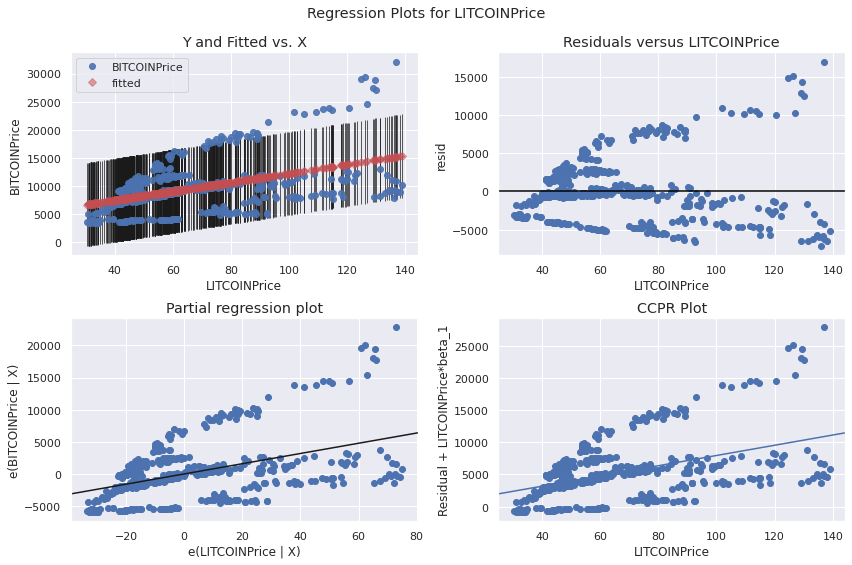

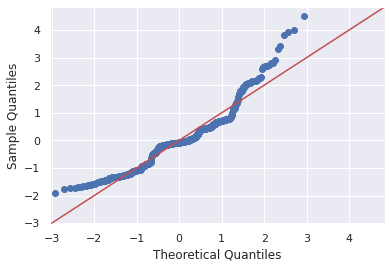

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'LITCOINPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     58.99
Date:                Tue, 04 May 2021   Prob (F-statistic):           6.77e-14
Time:                        02:49:35   Log-Likelihood:                -5667.8
No. Observations:                 583   AIC:                         1.134e+04
Df Residuals:                     581   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5255.0543    557.755      9.422      0.0

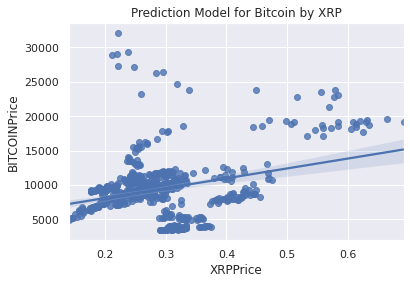

In [ ]:
#regression line for Litcoin
#Building the models
X_lr_1 = df3.XRPPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1) )

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))
print(lr_1_preds)

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.XRPPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by XRP')
plt.show();




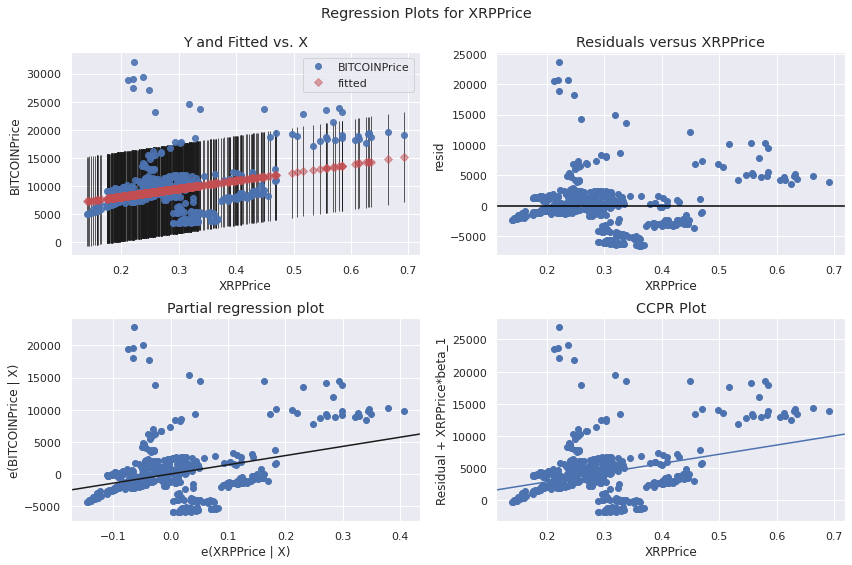

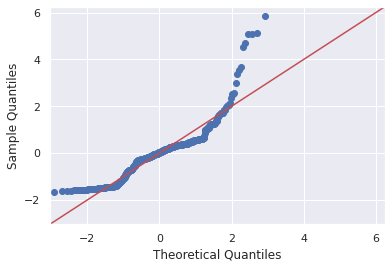

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'XRPPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     79.91
Date:                Tue, 04 May 2021   Prob (F-statistic):           5.19e-18
Time:                        02:49:37   Log-Likelihood:                -5658.5
No. Observations:                 583   AIC:                         1.132e+04
Df Residuals:                     581   BIC:                         1.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.917e+05   3.16e+04      9.235      

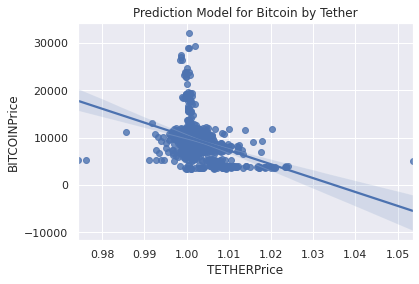

In [ ]:
#regression line for Litcoin
#Building the models
X_lr_1 = df3.TETHERPrice
y_lr_1 = df3.BITCOINPrice
# Create new training and test sets
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X_lr_1, y_lr_1,
                                                    test_size=0.2,
                                                    random_state=0)

# Linear regression works well for non-standardized data, so we are skipping standardization  

# Creating the linear regression model (for one feature)
lr_1_model = sm.OLS(y_train_lr_1, sm.add_constant(X_train_lr_1))

# Fitting the model to the data (i.e., training the model)
lr_1_results = lr_1_model.fit()

# Printing summary statistics of the model
print(lr_1_results.summary())

# Predictions on the test set
lr_1_preds = lr_1_results.predict(sm.add_constant(X_test_lr_1))
# print(lr_1_preds)

sns.set_theme(style="darkgrid")
sns.regplot(x=df3.TETHERPrice,y=df3.BITCOINPrice)
plt.title('Prediction Model for Bitcoin by Tether')
plt.show();


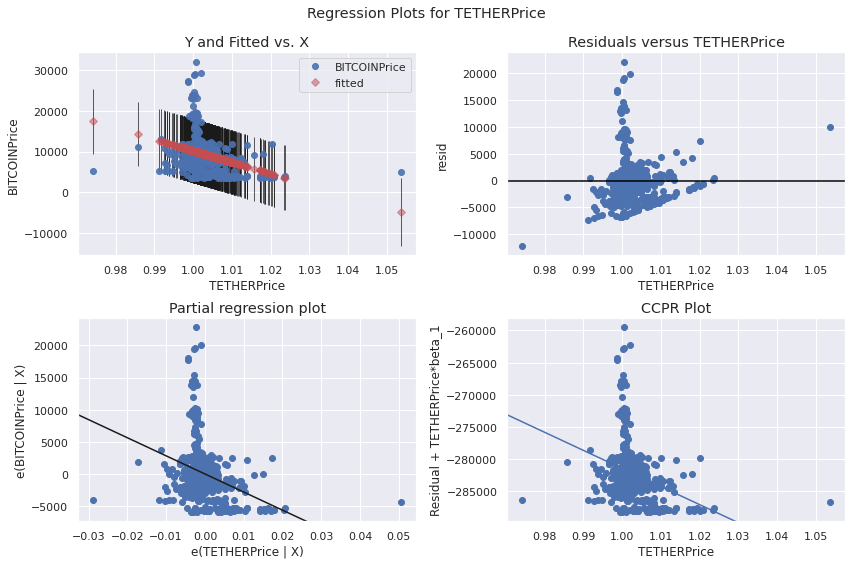

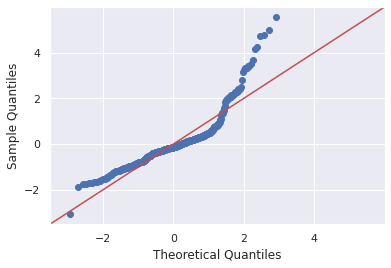

In [ ]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Produce residual plots
fig = sm.graphics.plot_regress_exog(lr_1_results, 'TETHERPrice', fig=fig)

#define residuals
res = lr_1_results.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [ ]:
hot_data = pd.get_dummies(df3[['ETHEREUMPrice', 'TETHERPrice']])
hot_data

,ETHEREUMPrice,TETHERPrice
Date,,
2019-01-01,140.819412,1.018335
2019-01-02,155.047684,1.024012
2019-01-03,149.135010,1.019473
2019-01-04,154.581940,1.017200
2019-01-05,155.638596,1.018489
...,...,...
2020-12-29,731.520142,0.998590
2020-12-30,751.618958,1.000275
2020-12-31,737.803406,1.000598


## What happens when we combine all these features

Begin by creating a coeeficient matrix

In [ ]:
X  = df3[['ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']]
y = df3['BITCOINPrice']
columns = ['BITCOINPrice', 'ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']
subset = df3[columns]
subset.corr()

,BITCOINPrice,ETHEREUMPrice,LITCOINPrice,XRPPrice,TETHERPrice
BITCOINPrice,1.000000,0.915938,0.462602,0.306097,-0.369503
ETHEREUMPrice,0.915938,1.000000,0.418453,0.437526,-0.296305
LITCOINPrice,0.462602,0.418453,1.000000,0.631056,-0.230333
XRPPrice,0.306097,0.437526,0.631056,1.000000,0.045154
TETHERPrice,-0.369503,-0.296305,-0.230333,0.045154,1.000000


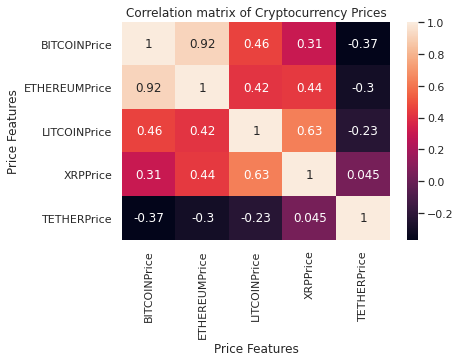

In [ ]:
import seaborn as sn

df = pd.DataFrame(df3,columns=columns)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.title("Correlation matrix of Cryptocurrency Prices")

plt.xlabel("Price Features")

plt.ylabel("Price Features")

plt.show()

In [ ]:
# Create new feature / predicted value vectors from the original data
X_mlr = df3[df3.columns[df3.columns!='BITCOINPrice']] #select all the independent columns
y_mlr = df3.BITCOINPrice 

# Create new training and test sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr,
                                                    test_size=0.2,
                                                    random_state=10)

# Create linear regression model (for all features)
mlr_model = sm.OLS(y_train_mlr, sm.add_constant(X_train_mlr) )

# Fitting the model to the data (i.e., training the model)
mlr_results = mlr_model.fit()

# Printing summary statistics of the model
print(mlr_results.summary())

# Predictions on the test set
mlr_preds = mlr_results.predict(sm.add_constant(X_test_mlr))


                            OLS Regression Results                            
Dep. Variable:           BITCOINPrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 04 May 2021   Prob (F-statistic):          5.98e-270
Time:                        02:49:56   Log-Likelihood:                -5064.4
No. Observations:                 583   AIC:                         1.014e+04
Df Residuals:                     578   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.93e+04    1.2e+04      2.441

#### 2. Multiple Linear Regression

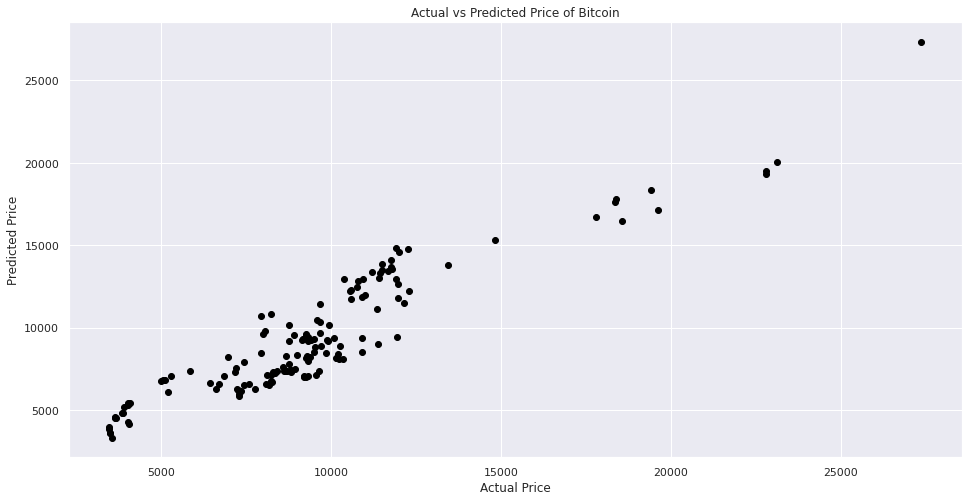

,Actual,Predicted,Deviations,Residuals
Date,,,,
2020-07-19,9164.231445,9291.006883,126.775437,1.607201e+04
2020-01-10,8166.554199,6522.787024,-1643.767175,2.701971e+06
2019-06-30,10583.134766,11742.497478,1159.362713,1.344122e+06
2020-12-17,22805.162109,19519.719801,-3285.442308,1.079413e+07
2019-08-21,10131.055664,8177.895699,-1953.159965,3.814834e+06
2020-05-12,9269.987305,8148.385169,-1121.602135,1.257991e+06
2020-09-19,10938.271484,12937.311433,1999.039949,3.996161e+06
2020-02-22,9663.181641,10365.481173,702.299532,4.932246e+05
2019-03-06,3903.942627,5196.709438,1292.766811,1.671246e+06


In [ ]:
#Building a multiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# #split the data
# X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)

#build the model
regressor = LinearRegression()
regressor.fit(X_train_mlr,y_train_mlr)

#predict the results
predicted=regressor.predict(X_test_mlr)

# plt.plot(y_test, predicted)

plt.subplots(figsize=(16, 8))
plt.scatter(y_test_mlr, predicted, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price of Bitcoin')
plt.show()

#create a dataframe for the actual and predicted values
dframe=pd.DataFrame(y_test_mlr,predicted, (predicted - y_test_mlr)**2)
dfr=pd.DataFrame({'Actual':y_test_mlr,'Predicted':predicted,'Deviations': (predicted - y_test_mlr), 'Residuals': (predicted - y_test_mlr)**2})
dfr.head(10)

In [ ]:
# print(regressor.coef_)


#### 3. KNN regressor

In [ ]:
X  = df3[['ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']]
y = df3['BITCOINPrice']
columns = ['BITCOINPrice', 'ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']
subset = df3[columns]
subset.corr()

,BITCOINPrice,ETHEREUMPrice,LITCOINPrice,XRPPrice,TETHERPrice
BITCOINPrice,1.000000,0.915938,0.462602,0.306097,-0.369503
ETHEREUMPrice,0.915938,1.000000,0.418453,0.437526,-0.296305
LITCOINPrice,0.462602,0.418453,1.000000,0.631056,-0.230333
XRPPrice,0.306097,0.437526,0.631056,1.000000,0.045154
TETHERPrice,-0.369503,-0.296305,-0.230333,0.045154,1.000000


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection

#split the data and scale it
X  = df3[['ETHEREUMPrice','LITCOINPrice','XRPPrice', 'TETHERPrice']]
y = df3['BITCOINPrice']
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#build and train the model
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)


In [ ]:
#KNN cross validation
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("\nAccuracy: ", results_kfold.mean()*100)


Accuracy:  82.08664364269535


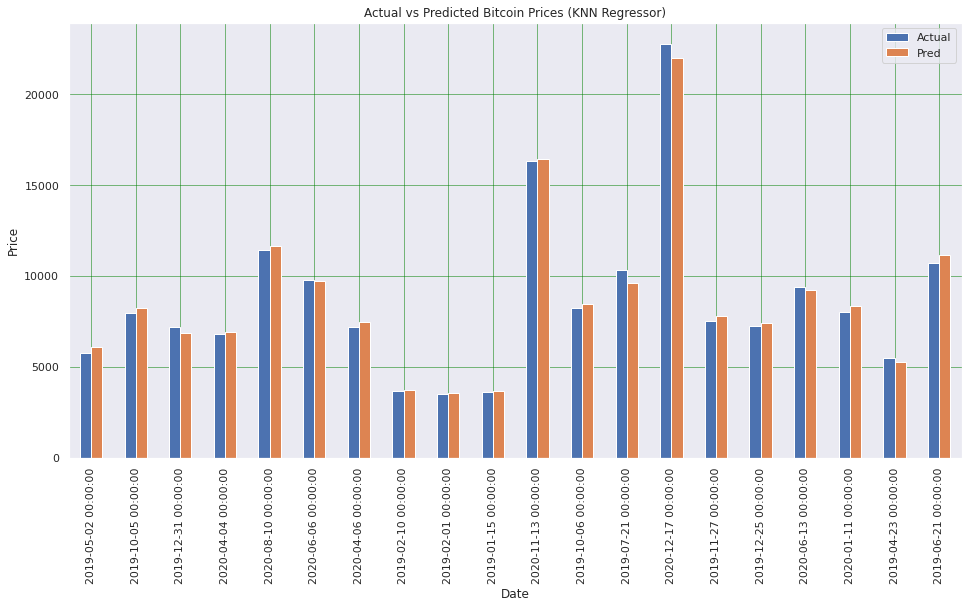

In [ ]:
knn_df=pd.DataFrame({"Actual":y_test,"Pred":y_knn_pred}) #set-up dataframe for the data
knn_df.head(20).plot(kind="bar",figsize=(16,8))  #plot first 20 values
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=':', linewidth=0.5, color="black")
plt.ylabel("Price")
plt.title("Actual vs Predicted Bitcoin Prices (KNN Regressor)")
plt.show()

In [ ]:
# lets see how the accuracy varies with the number of neighbors
from sklearn import metrics
scores = []
m = range(1,25)
# Check number of neighbors
for k in m:
    # Initialize the KNN Classifier
    knn_regressor=KNeighborsRegressor(n_neighbors = k)
    model = knn_regressor.fit(X_train,y_train)
    y_pred=model.predict(X_test)
  
    knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
    results_kfold = model_selection.cross_val_score(model, X_test, y_test.astype('int'), cv=knn_kfold)
    scores.append(results_kfold.mean()*100)
print(scores)


[90.89436396399698, 84.23886725908835, 84.28430364464555, 83.30857447196742, 82.08664364269535, 80.32007697960017, 78.88653373577233, 77.26440885344115, 75.08876615114953, 75.62624887665856, 74.68500071553335, 73.1992574176701, 71.29419968604866, 70.70375743349707, 70.4426187381022, 69.70830818761242, 68.92670565653759, 67.99952219349483, 67.69128431499902, 66.42141526205148, 66.55371613664397, 65.51959972992032, 64.65375490495246, 63.74158775033123]


 How does accuracy vary with number of neighbours?

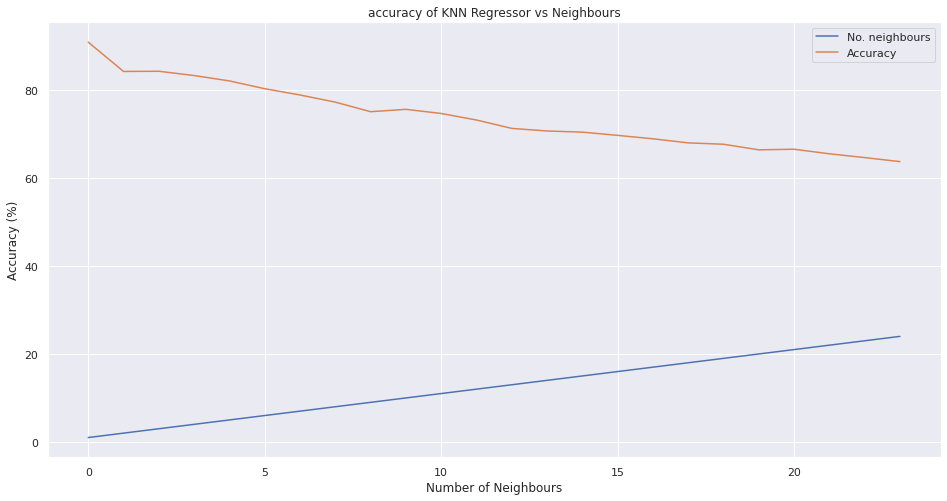

In [ ]:

data = pd.DataFrame({"No. neighbours":m,"Accuracy":(scores)})
# plt.plot(data["No. neighbours"], data["Accuracy"])
data.plot(kind="line", figsize=(16,8))
# plt.ylim(0,100)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy (%)')
plt.title('accuracy of KNN Regressor vs Neighbours')
plt.show()



Implement Grid search on the parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 1}

#### 4. SVM Regression Model

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel="linear")
svm_model=svm_regressor.fit(X_train,y_train)
y_svm_pred=svm_model.predict(X_test)

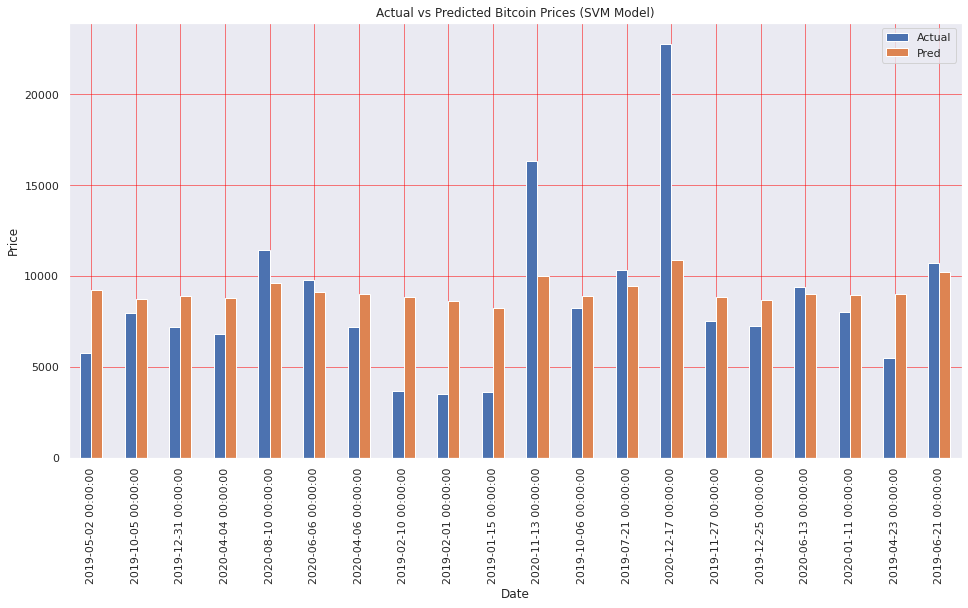

In [ ]:
svm_df=pd.DataFrame({"Actual":y_test,"Pred":y_svm_pred})
svm_df.head(20).plot(kind="bar",figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="red")
plt.grid(which="minor", linestyle=':', linewidth=0.5, color="green")
plt.ylabel("Price")
plt.title("Actual vs Predicted Bitcoin Prices (SVM Model)")
plt.show()

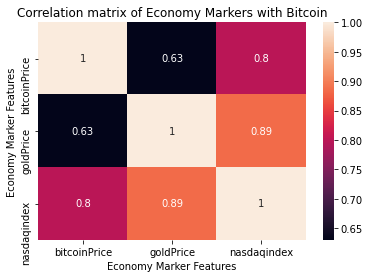

In [ ]:
import seaborn as sn
btc = pd.read_csv('/BTC-Clean.csv')
gold = pd.read_csv('//GOLD-Clean.csv')
nasdaq = pd.read_csv('/NASDAQ-Clean.csv')
#bictoin 
#merge our data set by taking only the closing prices
df4 = pd.concat([btc['Close'],gold['Close'], nasdaq['Close']], axis=1)
#rename the columns
df4.columns = ['bitcoinPrice', 'goldPrice', 'nasdaqindex']
df4.head()


df = pd.DataFrame(df4)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.title("Correlation matrix of Economy Markers with Bitcoin", y=-0.75)

plt.xlabel("Economy Marker Features")

plt.ylabel("Economy Marker Features")

plt.show()

In [ ]:
m = pd.read_csv('/content/bitcoin_csv.csv')
m.head()
merge = m.merge(gold, 'right', on='Date')
merge.tail(20)

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
481,2020-12-03,19566.191406,18925.785156,19205.925781,19445.398438,3.193032e+10,19445.398438,298.690002,299.279999,291.579987,294.170013,294.170013,0
482,2020-12-04,19511.404297,18697.193359,19446.966797,18699.765625,3.387239e+10,18699.765625,294.140015,296.459991,290.329987,292.470001,292.470001,0
483,2020-12-07,19411.828125,18931.142578,19343.128906,19191.630859,2.689636e+10,19191.630859,291.859985,307.450012,291.859985,303.880005,303.880005,0
484,2020-12-08,19283.478516,18269.945312,19191.529297,18321.144531,3.169229e+10,18321.144531,306.100006,306.399994,301.640015,303.119995,303.119995,0
485,2020-12-09,18626.292969,17935.546875,18320.884766,18553.916016,3.442037e+10,18553.916016,299.660004,300.640015,290.959991,293.940002,293.940002,0
486,2020-12-10,18553.298828,17957.064453,18553.298828,18264.992188,2.554713e+10,18264.992188,295.559998,300.269989,292.630005,294.649994,294.649994,0
487,2020-12-11,18268.453125,17619.533203,18263.929688,18058.904297,2.791964e+10,18058.904297,293.929993,296.619995,290.950012,291.679993,291.679993,0
488,2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,2.247400e+10,19246.644531,291.309998,294.679993,284.619995,284.809998,284.809998,0
489,2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,2.674198e+10,19417.076172,291.350006,297.190002,290.670013,295.820007,295.820007,0
490,2020-12-16,21458.908203,19298.316406,19418.818359,21310.597656,4.440901e+10,21310.597656,298.070007,301.299988,293.329987,301.230011,301.230011,0


In [ ]:
eth= pd.read_csv('/content/ethereum_csv.csv')
eth.head()
ethgoldmerge = eth.merge(gold, 'right', on='Date')
ethgoldmerge.tail(20)

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
481,2020-12-03,622.452698,588.346375,598.459229,616.708740,1.614619e+10,616.708740,298.690002,299.279999,291.579987,294.170013,294.170013,0
482,2020-12-04,618.983154,569.283508,616.722778,569.354187,1.633759e+10,569.354187,294.140015,296.459991,290.329987,292.470001,292.470001,0
483,2020-12-07,602.917908,585.428650,601.797119,591.843384,1.072048e+10,591.843384,291.859985,307.450012,291.859985,303.880005,303.880005,0
484,2020-12-08,594.751587,552.469238,591.900818,554.827759,1.439892e+10,554.827759,306.100006,306.399994,301.640015,303.119995,303.119995,0
485,2020-12-09,577.288391,532.998413,554.792908,573.479126,1.585592e+10,573.479126,299.660004,300.640015,290.959991,293.940002,293.940002,0
486,2020-12-10,574.600159,549.784058,573.504028,559.678528,1.167258e+10,559.678528,295.559998,300.269989,292.630005,294.649994,294.649994,0
487,2020-12-11,560.376709,537.811646,559.679199,545.797363,1.109882e+10,545.797363,293.929993,296.619995,290.950012,291.679993,291.679993,0
488,2020-12-14,590.492981,577.118408,589.782471,586.011169,8.125837e+09,586.011169,291.309998,294.679993,284.619995,284.809998,284.809998,0
489,2020-12-15,596.247742,580.628784,586.021790,589.355591,9.326646e+09,589.355591,291.350006,297.190002,290.670013,295.820007,295.820007,0
490,2020-12-16,636.640320,582.039124,589.378662,636.181824,1.581725e+10,636.181824,298.070007,301.299988,293.329987,301.230011,301.230011,0


#### 5. Decision Tree Model (Not convenient based on our data)

In [ ]:
X= pd.get_dummies(df3['ETHEREUMPrice'])
# X = df3['ETHEREUMPrice']
y = pd.get_dummies(df3['BITCOINPrice'])
X

,104.535301,104.919289,105.598213,106.589973,107.061012,107.443520,107.492668,107.609787,107.821602,108.907539,110.430260,110.605873,112.347122,113.405289,113.942749,114.842270,116.378342,116.488739,116.897804,117.157852,117.362885,117.452606,118.747551,119.267746,119.430885,119.474831,121.010262,121.298393,121.390205,122.032715,122.100388,122.553604,122.572289,122.603889,123.260216,123.306023,123.321152,123.547066,123.741920,124.519020,...,545.797363,549.486633,554.827759,558.068115,559.678528,568.567322,569.354187,570.686646,573.479126,575.758057,583.714600,586.011169,587.324158,589.355591,589.663208,591.843384,596.595459,598.352356,601.908997,603.897766,608.454041,609.817871,611.607178,614.842529,616.708740,626.410706,634.854187,635.835815,636.181824,638.290833,642.868958,654.811951,659.297913,682.642334,730.367554,730.397339,731.520142,737.803406,751.618958,774.534973
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2020-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#create the train and validation data sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)
                                          

In [ ]:
#
y_train.value_counts(normalize=True)

3399.4716796875  3413.767822265625  3448.116943359375  3457.792724609375  3459.154052734375  3464.013427734375  3466.357421875  3470.450439453125  3486.181640625  3487.9453125  3521.060791015625  3552.953125  3576.032470703125  3583.9658203125  3585.123046875  3599.765869140625  3600.865478515625  3601.013671875  3602.46044921875  3604.5771484375  3616.880859375  3620.810791015625  3629.78759765625  3630.67529296875  3632.070556640625  3648.4306640625  3653.528564453125  3655.0068359375  3657.83935546875  3661.301025390625  3666.7802734375  3671.20361328125  3673.836181640625  3678.56396484375  3678.924560546875  3687.365478515625  3690.188232421875  3706.05224609375  3728.568359375  3761.55712890625  3810.427490234375  3836.7412109375  3843.52001953125  3845.194580078125  3847.17578125  3851.04736328125  3854.35791015625  3854.785400390625  3857.717529296875  3859.583740234375  3864.4150390625  3882.6962890625  3896.375  3901.131591796875  3903.942626953125  3905.227294921875  3906.71

In [ ]:
#find the shapes of our training data
X_train.shape, y_train.shape

((583, 729), (583, 729))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#create our model
tree_model = DecisionTreeClassifier(random_state=10)

#fit the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
# #check the performance of the model on the training set
tree_model.score(X_train, y_train)

1.0

In [ ]:
#checking the validation score
tree_model.score(X_valid, y_valid)

0.0

In [ ]:
#predictions on the validation set (probabilities)
# tree_model.predict_proba(X_valid)

In [ ]:
y_pred = tree_model.predict_proba(X_valid)

In [ ]:
new_y = []
for i in range (len(y_pred)):
  if y_pred[i] < 0.6:
    new_y.append(0)
  else:
    new_y.append(1)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_valid, new_y)

Changing the max depth

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
  tree_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  tree_model.fit(X_train, y_train)
  train_accuracy.append(tree_model.score(X_train, y_train))
  validation_accuracy.append(tree_model.score(X_valid, y_valid))

In [ ]:
dataframe = pd.DataFrame({'max_depth': range(1, 10), 'train_acc': train_accuracy, 'valid_acc': validation_accuracy})
dataframe.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataframe['max_depth'], dataframe['train_acc'], marker='o')
plt.plot(dataframe['max_depth'], dataframe['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance of the model')
plt.legend()


In [ ]:
#tuning more parameters
tree_model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=25, random_state=10)

In [ ]:
#fit the model again
tree_model.fit(X_train, y_train)

#training score
tree_model.score(X_train, y_train)



In [ ]:
#validation score
tree_model.score(X_valid, y_valid)

In [ ]:
from sklearn import tree


In [ ]:
!pip install graphviz

In [ ]:
decision_tree = tree.export_graphviz(tree_model, out_file='tree.dot', feature_names=X_train.columns, 
                                     max_depth=2,
                                     filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)